### Indonesian Abusive and Hate Speech Twitter Text

Dataset used for text cleansing and further analysis is publicly available on Kaggle. This dataset contains tweets from Indonesian Twitter with multi-label hate speech and abusive language annotation, also abusive and alay words dictionary for data processing. <br>
Data Source: [Kaggle](https://www.kaggle.com/datasets/ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text)

# Exploratory Data Analysis on Tweet Data

### Introduction

Twitter is one of the most popular social media platforms with claimed number of users around 528.3 million active users as of 2023. While in Indonesia alone, it is estimated that there are around 24 millions active users. This implies that there is a large number of people that post their opinions and experiences to Twitter everyday, that can actually be seen publicly. From tweet data, we can analyze how users perceive certain topics or events.<br>
This dataset contains tweets from Indonesia's twitter space that were already labeled for their hate speech and abusive language contents.

**Exploratory Questions**<br>
*  What are the most common words overall?
*  What are the most used abusive words?
*  What are the distribution of hate speech labeled tweets based on their level?
*  What are the most used abusive words in each level?
*  What are the distribution of hate speech labeled tweets based on their categories?
*  What are the composition of each hate speech tweets' level based on their categories?
*  Is there any correlation between hate speech labeled tweets and abusive words usage?

## Preparing the environment

Library used for data exploration<br>
*  Pandas, Numpy, and Regex - Data Processing
*  Seaborn and Matplotlib - Data Visualisation
*  Sqlite3 - Access data cleansing result
*  Collections and Wordcloud - Data Analysis

In [360]:
# import library
import re
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sqlite3
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [2]:
# import kamus alay & kamus abusive
# kamus abusive
abusive_data = pd.read_csv("csv_data/abusive.csv")
# kamus alay
kamus_alay_data = pd.read_csv("csv_data/alay.csv", encoding="latin-1")
kamus_alay_data.columns = ['alay', 'baku']
kamus_alay_dict = dict(zip(kamus_alay_data['alay'], kamus_alay_data['baku']))

## Checking the Dataset

**Open Text Data Cleansing Result using sqlite3**

In [3]:
# create connection
connection = sqlite3.connect('gold_challenge.db')

In [4]:
# read cleansing result database
df_result = pd.read_sql("SELECT * FROM cleansing_result", connection)
df_result

,raw_text,clean_text
0,- disaat semua cowok berusaha melacak perhatia...,di saat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat memberi tau kamu e*** s**** g...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berpikir kenapa aku tetap percay...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku ku tau matamu s**** tapi dilihat d...
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum c***** k**** sudah kelihatan dongoknya da...
...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,jangan asal berbicara ndasmu c***** kamu yang ...
13165,USER Kasur mana enak kunyuk',kasur mana enak k*****
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,hati hati b*** tidak lagi bosan duh
13167,USER USER USER USER Bom yang real mudah terdet...,bom yang real mudah terdeteksi bom yang terkub...


**Open Original Dataset**

In [5]:
df_raw = pd.read_csv("data.csv", encoding="latin-1")
df_raw

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


**Concat Result Data & Original Data's Labels For Analysis**

In [6]:
df_raw.columns

Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')

In [7]:
# get labels only
df_raw_label = df_raw[['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
                      'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
                      'HS_Moderate', 'HS_Strong']]

In [8]:
# combined dataframe
df_merge = pd.concat([df_result, df_raw_label], axis=1)
df_merge

,raw_text,clean_text,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat memberi tau kamu e*** s**** g...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku ku tau matamu s**** tapi dilihat d...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum c***** k**** sudah kelihatan dongoknya da...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,jangan asal berbicara ndasmu c***** kamu yang ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',kasur mana enak k*****,0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,hati hati b*** tidak lagi bosan duh,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,bom yang real mudah terdeteksi bom yang terkub...,0,0,0,0,0,0,0,0,0,0,0,0


**Check Number of Columns and Total Data**

In [9]:
print(f"Dataset ini terdiri dari {df_merge.shape[0]} baris dan {df_merge.shape[1]} kolom")

Dataset ini terdiri dari 13169 baris dan 14 kolom


**Check For Duplicated Data**

In [10]:
# duplicated data
df_merge.duplicated('raw_text').sum()

146

In [11]:
# unique data
df_merge['raw_text'].nunique()

13023

In [12]:
# drop duplicated data
df_merge = df_merge.drop_duplicates('raw_text')

In [13]:
df_merge.shape

(13023, 14)

**Check Missing Values**

In [14]:
df_merge.isna().sum()

raw_text         0
clean_text       0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

## Data Analysis Preparation

**Add new column for text that were only cleaned using kamus alay**

In [15]:
# text cleansing function
# function to replace alay words to formal words
def alay_cleansing(text):
    for key, value in kamus_alay_dict.items():
        if key == text:
            text = text.replace(key, value)
    return text 

def text_cleansing(text):
    # lowercase
    clean_text = str(text).lower()
    # clean URL
    clean_text = re.sub(r'(http\S+|www\S+)', '', clean_text).strip()
    # clean emoticon byte
    clean_text = clean_text.replace("\\", " ")
    clean_text = re.sub(r'\bx[0-9a-fA-F]{2,}', ' ', clean_text)
    clean_text = re.sub(r'\bn\b', ' ', clean_text)
    clean_text = re.sub('\\+', ' ', clean_text)
    clean_text = re.sub('  +', ' ', clean_text)
    # clean punctuations
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', ' ', clean_text)
    # clean username
    clean_text = re.sub(r'\buser\b', '', clean_text, flags=re.IGNORECASE)
    # clean rt (retweet)
    clean_text = re.sub(r'\brt\b', '', clean_text, flags=re.IGNORECASE)
    # subtitute alay word with formal word
    clean_text = ' '.join([alay_cleansing(j) for j in clean_text.split()])
    # clean url
    clean_text = re.sub('uniform resource locator',' ',clean_text).strip()
    return clean_text

In [16]:
# copy dataset for further analysis
df_analysis = df_merge.copy()

# clean dataset without censoring abusive words
df_analysis['clean_alay'] = df_analysis['raw_text'].apply(text_cleansing)
df_analysis

,raw_text,clean_text,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,clean_alay
0,- disaat semua cowok berusaha melacak perhatia...,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,di saat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat memberi tau kamu e*** s**** g...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat memberi tau kamu edan sarap g...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,41 kadang aku berpikir kenapa aku tetap percay...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku ku tau matamu s**** tapi dilihat d...,0,0,0,0,0,0,0,0,0,0,0,0,aku itu aku ku tau matamu sipit tapi dilihat d...
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum c***** k**** sudah kelihatan dongoknya da...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir sudah kelihatan dongoknya da...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,jangan asal berbicara ndasmu c***** kamu yang ...,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal berbicara ndasmu congor kamu yang ...
13165,USER Kasur mana enak kunyuk',kasur mana enak k*****,0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,hati hati b*** tidak lagi bosan duh,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu tidak lagi bosan duh
13167,USER USER USER USER Bom yang real mudah terdet...,bom yang real mudah terdeteksi bom yang terkub...,0,0,0,0,0,0,0,0,0,0,0,0,bom yang real mudah terdeteksi bom yang terkub...


**Identify Abusive Words in each Tweet**

In [17]:
# function to find abusive words
def find_abusive(text):
    text = text_cleansing(text)
    words = text.split()
    abusive_word = []
    for word in words:
        for item in abusive_data['ABUSIVE']:
            if item == word:
                abusive_word.append(word)
    return abusive_word
find_abusive("USER Ada cebong bang dia merasa paling benar")

['cebong']

In [18]:
# add new column for abusive word appearance
df_analysis['abusive_word'] = df_analysis['clean_alay'].apply(find_abusive)
df_analysis

,raw_text,clean_text,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,clean_alay,abusive_word
0,- disaat semua cowok berusaha melacak perhatia...,di saat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0,di saat semua cowok berusaha melacak perhatian...,[bego]
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat memberi tau kamu e*** s**** g...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat memberi tau kamu edan sarap g...,"[edan, sarap]"
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berpikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0,41 kadang aku berpikir kenapa aku tetap percay...,[]
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku ku tau matamu s**** tapi dilihat d...,0,0,0,0,0,0,0,0,0,0,0,0,aku itu aku ku tau matamu sipit tapi dilihat d...,[sipit]
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum c***** k**** sudah kelihatan dongoknya da...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir sudah kelihatan dongoknya da...,"[cebong, kafir, dungu]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,jangan asal berbicara ndasmu c***** kamu yang ...,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal berbicara ndasmu congor kamu yang ...,"[congor, anjing]"
13165,USER Kasur mana enak kunyuk',kasur mana enak k*****,0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk,[kunyuk]
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,hati hati b*** tidak lagi bosan duh,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu tidak lagi bosan duh,[bisu]
13167,USER USER USER USER Bom yang real mudah terdet...,bom yang real mudah terdeteksi bom yang terkub...,0,0,0,0,0,0,0,0,0,0,0,0,bom yang real mudah terdeteksi bom yang terkub...,[]


## 1. What are the most common words overall?

In [19]:
# import stopword bahasa Indonesia
stopword_id = pd.read_csv("csv_data/stopword.csv")
stwordid = stopword_id['kata'].to_list()

In [94]:
# count most common words
df_dummy = df_analysis.copy()
df_dummy['temp_list'] = df_dummy['clean_alay'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_dummy['temp_list'] for item in sublist if item not in stwordid])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']

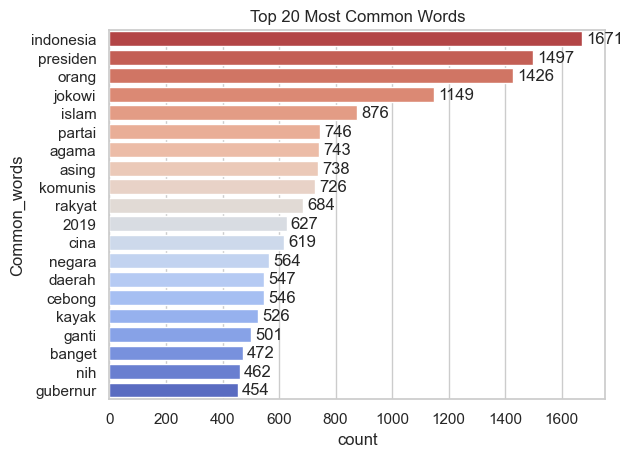

In [98]:
# Plot Bar Plot for Most Common Words Overall
sns.set_theme(style="whitegrid")
colors = sns.color_palette("coolwarm", 20)
colors.reverse()
ax = sns.barplot(data = temp, y = temp['Common_words'], x = temp['count'], palette = colors)
ax.bar_label(ax.containers[0], padding=3, fmt='%.0f')
plt.title("Top 20 Most Common Words")
plt.show()

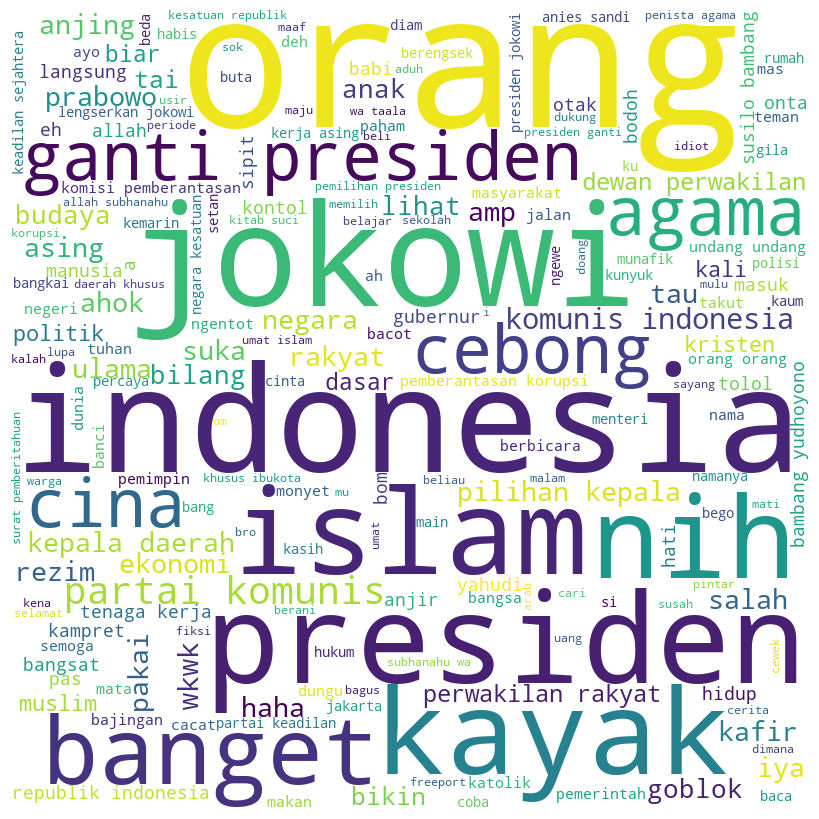

In [99]:
# wordcloud for overall text data
comment_words = ''
stopwords = set(stwordid)
 
# iterate through the csv file
for val in df_dummy['clean_alay']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

**Observation found based on data analysis above:**
*  This data contains tweet in Indonesia twitter space around 2018, which was near the 2019 presidential election. This tracks considering Indonesia, presiden (president), Jokowi (Indonesia's elected president from previous period), and partai (party) were among the words that appear most frequently.
*  The majority of Indonesia's population is Muslim and religion is such a important topic for a lot of people here. Hence, it's not strange that islam and religion would come out a lot in multiple discourse on Twitter.
*  Abusive words that appear most frequently were asing (foreign or foreigner), komunis (communist), cebong (nickname for Joko Widodo supporters), kafir (heathen or infidel), and rezim (regime). And those were the kind of mockery that often used in heated political discourse.
* Famous political figure name like Jokowi, Ahok, Prabowo, Anies, and Sandi were often mentioned too.

## 2. What are the most used abusive words?

In [104]:
# counting most used abusive words
top_abs = Counter([item for sublist in df_dummy['abusive_word'] for item in sublist if item not in stwordid])
temp_abs = pd.DataFrame(top_abs.most_common(20))
temp_abs.columns = ['Common_words','count']

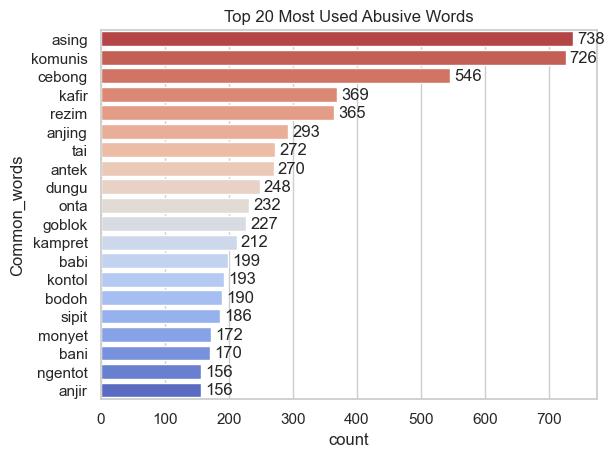

In [101]:
# Plot Bar Plot for Most Common Words Overall
sns.set_theme(style="whitegrid")
colors = sns.color_palette("coolwarm", 20)
colors.reverse()
ax = sns.barplot(data = temp_abs, y = temp_abs['Common_words'], x = temp_abs['count'], palette = colors)
ax.bar_label(ax.containers[0], padding=3, fmt='%.0f')
plt.title("Top 20 Most Used Abusive Words")
plt.show()

## 3. The distribution of hate speech based on their level

In [344]:
# Create dataset that contains only hate speech
df_hs = df_dummy.loc[df_dummy['HS'] == 1]

(array([0, 1, 2]),
 [Text(0, 0, 'Weak'), Text(1, 0, 'Moderate'), Text(2, 0, 'Strong')])

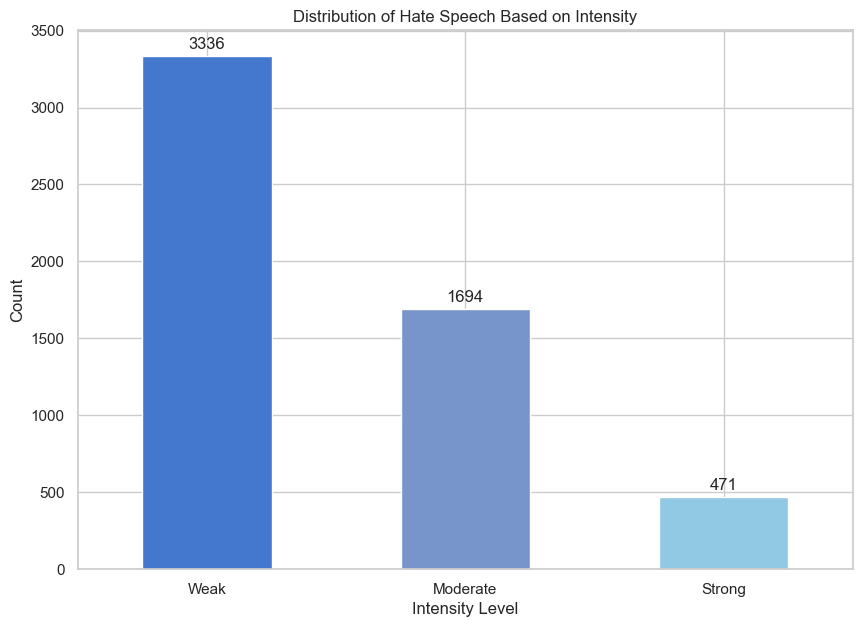

In [160]:
# Create separate dataset to count each hate speech level's value
df_lvl = df_hs[['HS_Weak', 'HS_Moderate', 'HS_Strong']]
df_lvl.columns = ['Weak', 'Moderate', 'Strong']
sums_hs = df_lvl.iloc[:,].sum()

# Create bar plot
colors = ['#4477CE','#7895CB','#91C8E4']
ax = sums_hs.plot(kind='bar', color= colors, figsize=(10,7))
ax.bar_label(ax.containers[0], padding=3, fmt='%.0f')

# Set plot labels and title
plt.xlabel('Intensity Level')
plt.ylabel('Count')
plt.title('Distribution of Hate Speech Based on Intensity')

plt.xticks(rotation=360)

Text(0.5, 1.0, 'Hate Speech Level Distribution')

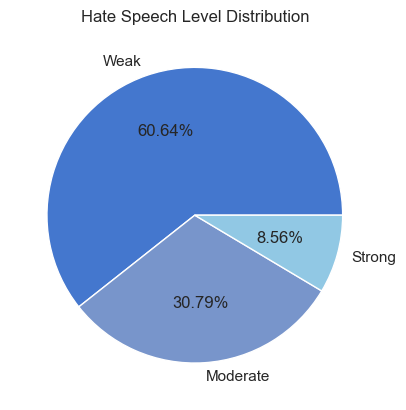

In [161]:
# Pie chart
colors = ['#4477CE','#7895CB','#91C8E4']
sums_hs.plot(kind='pie', autopct='%1.2f%%', colors=colors)
plt.title('Hate Speech Level Distribution')

**Observation found based on data analysis above:**
*  Hate speech defined as a public speech that expresses hate or encourages violence towards a person or group based on something such as race, religion, sex, or sexual orientation.
*  The most common words for tweet with hate speech label are Indonesia, Presiden (president), Jokowi, Cebong, and partai (party), which were words that often used in tweets that talk about politics. 
*  Most common abusive words are also words that are often used in heated online political debates.
*  60.64% out of all tweets with hate speech label are considered weak hate speech, which is hate speech that aimed at individuals without including incitement/provocation to bring open conflict.

## 4. What are the most used abusive words in each level?

### Weak Hate Speech

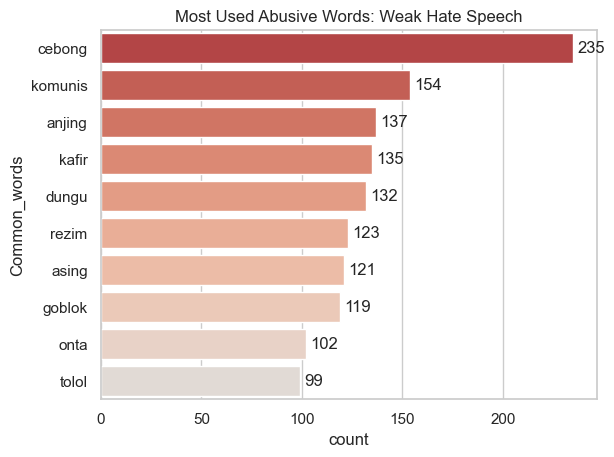

In [140]:
# Create dataset where HS_Weak is true 
df_weak = df_dummy.loc[df_dummy['HS_Weak'] == 1]

# Calculate abusive words occurence
top_abs_weak = Counter([item for sublist in df_weak['abusive_word'] for item in sublist if item not in stwordid])
temp_abs_weak = pd.DataFrame(top_abs_weak.most_common(10))
temp_abs_weak.columns = ['Common_words','count']

# Create Bar Plot
sns.set_theme(style="whitegrid")
colors = sns.color_palette("coolwarm", 20)
colors.reverse()
ax = sns.barplot(data = temp_abs_weak, y = temp_abs_weak['Common_words'], x = temp_abs_weak['count'], palette = colors)
ax.bar_label(ax.containers[0], padding=3, fmt='%.0f')
plt.title("Most Used Abusive Words")
plt.show()

### Moderate Hate Speech

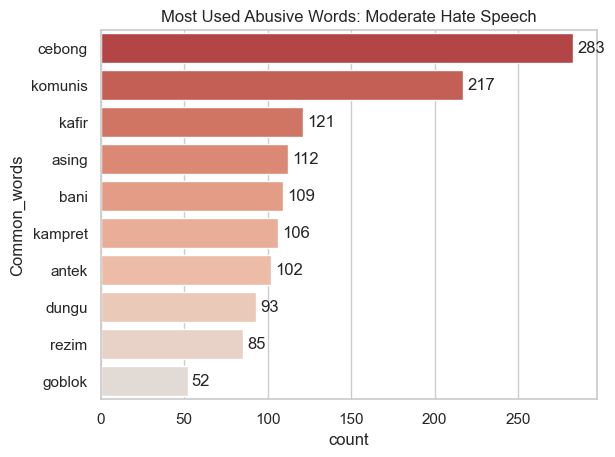

In [141]:
# Create dataset where HS_Moderate is true 
df_moderate = df_dummy.loc[df_dummy['HS_Moderate'] == 1]

# Calculate abusive words occurence
top_abs_moderate = Counter([item for sublist in df_moderate['abusive_word'] for item in sublist if item not in stwordid])
temp_abs_moderate = pd.DataFrame(top_abs_moderate.most_common(10))
temp_abs_moderate.columns = ['Common_words','count']

# Create Bar Plot
sns.set_theme(style="whitegrid")
colors = sns.color_palette("coolwarm", 20)
colors.reverse()
ax = sns.barplot(data = temp_abs_moderate, y = temp_abs_moderate['Common_words'], x = temp_abs_moderate['count'], palette = colors)
ax.bar_label(ax.containers[0], padding=3, fmt='%.0f')
plt.title("Most Used Abusive Words: Moderate Hate Speech")
plt.show()

### Strong Hate Speech

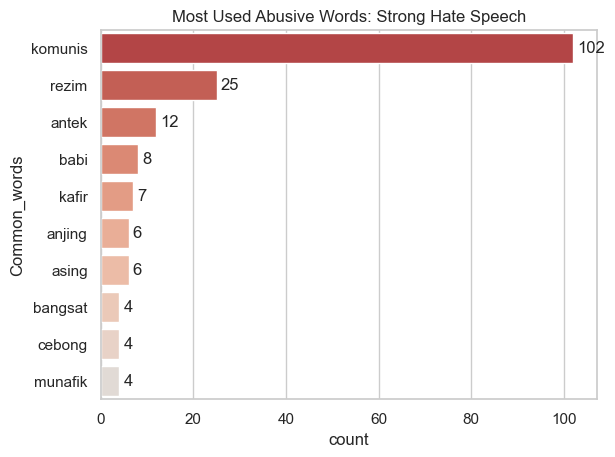

In [142]:
# Create dataset where HS_Strong is true 
df_strong = df_dummy.loc[df_dummy['HS_Strong'] == 1]

# Calculate abusive words occurence
top_abs_strong = Counter([item for sublist in df_strong['abusive_word'] for item in sublist if item not in stwordid])
temp_abs_strong = pd.DataFrame(top_abs_strong.most_common(10))
temp_abs_strong.columns = ['Common_words','count']

# Create Bar Plot
sns.set_theme(style="whitegrid")
colors = sns.color_palette("coolwarm", 20)
colors.reverse()
ax = sns.barplot(data = temp_abs_strong, y = temp_abs_strong['Common_words'], x = temp_abs_strong['count'], palette = colors)
ax.bar_label(ax.containers[0], padding=3, fmt='%.0f')
plt.title("Most Used Abusive Words: Strong Hate Speech")
plt.show()

## 5. The distribution of hate speech based on their categories

Tweets that are labeled as hate speech are divided into two big categories, that are hate speech againts <b>Individual</b> and <b>Group</b>. Then those tweets are further divided into multiple sub-categories based on their intent. <br>
1. <b>HS_Religion</b> : hate speech related to religion/creed;
2. <b>HS_Race</b> : hate speech related to race/ethnicity;
3. <b>HS_Physical</b> : hate speech related to physical/disability;
4. <b>HS_Gender</b> : hate speech related to gender/sexual orientation;
5. <b>HS_Other</b> : hate related to other invective/slander;

Text(0.5, 1.0, 'Hate Speech Distribution Based on Category')

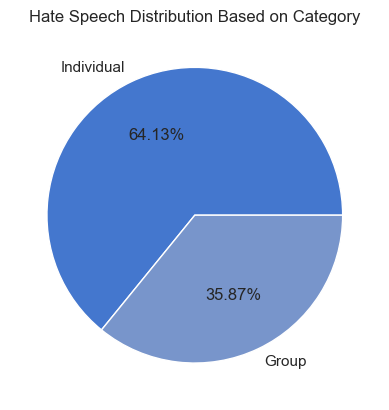

In [167]:
# Calculate individual and group sum value
df_category = df_hs[['HS_Individual', 'HS_Group']]
df_category.columns = ['Individual', 'Group']
sums_category = df_category.iloc[:,].sum()

# Plot Pie chart
colors = ['#4477CE','#7895CB']
sums_category.plot(kind='pie', autopct='%1.2f%%', colors=colors)
plt.title('Hate Speech Distribution Based on Category')

### Hate Speech Againts <b>Individual</b>

In [288]:
# Create dataset
df_individual = df_dummy.loc[df_dummy['HS_Individual'] == 1]

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Religion'),
  Text(1, 0, 'Race'),
  Text(2, 0, 'Physical'),
  Text(3, 0, 'Gender'),
  Text(4, 0, 'Other')])

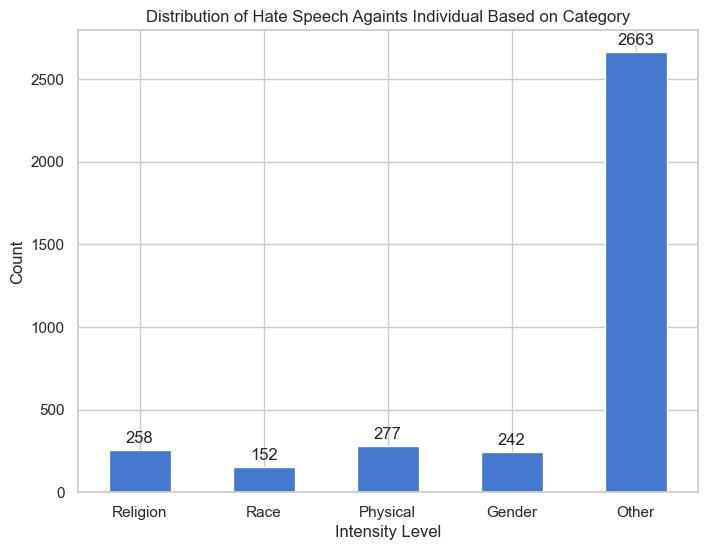

In [289]:
# Calculate individual and group sum value
df_subcategory1 = df_individual[['HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']]
df_subcategory1.columns = ['Religion', 'Race', 'Physical', 'Gender', 'Other']
sums_subcategory1 = df_subcategory1.iloc[:,].sum()

# Create bar plot
ax = sums_subcategory1.plot(kind='bar', color='#4477CE', figsize=(8,6))
ax.bar_label(ax.containers[0], padding=3, fmt='%.0f')

# Set plot labels and title
plt.xlabel('Intensity Level')
plt.ylabel('Count')
plt.title('Distribution of Hate Speech Againts Individual Based on Category')

plt.xticks(rotation=360)

In [290]:
sums_subcategory1

Religion     258
Race         152
Physical     277
Gender       242
Other       2663
dtype: int64

### Hate Speech Againts <b>Group</b>

In [218]:
df_group = df_dummy.loc[df_dummy['HS_Group'] == 1]

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Religion'),
  Text(1, 0, 'Race'),
  Text(2, 0, 'Physical'),
  Text(3, 0, 'Gender'),
  Text(4, 0, 'Other')])

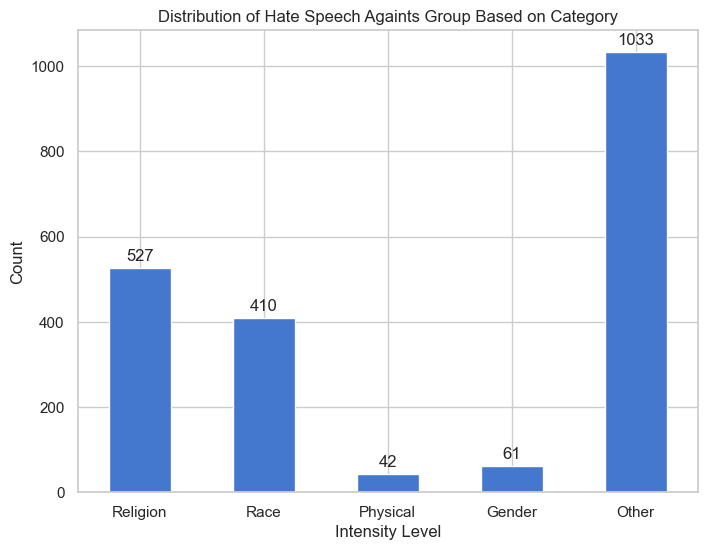

In [322]:
# Calculate individual and group sum value
df_subcategory2 = df_group[['HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']]
df_subcategory2.columns = ['Religion', 'Race', 'Physical', 'Gender', 'Other']
sums_subcategory2 = df_subcategory2.iloc[:,].sum()

# Create bar plot
ax = sums_subcategory2.plot(kind='bar', color='#4477CE', figsize=(8,6))
ax.bar_label(ax.containers[0], padding=3, fmt='%.0f')

# Set plot labels and title
plt.xlabel('Intensity Level')
plt.ylabel('Count')
plt.title('Distribution of Hate Speech Againts Group Based on Category')

plt.xticks(rotation=360)

## 6. Composition of each hate speech level based on categories

Text(0.5, 1.0, 'Weak Hate Speech Distribution Based on Category')

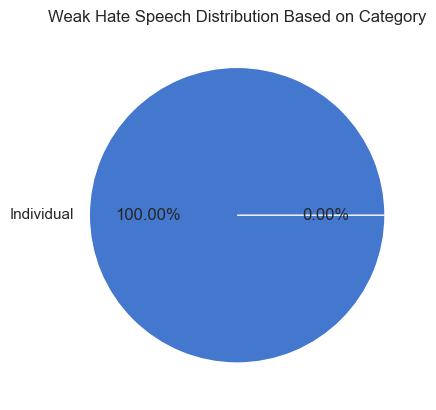

In [328]:
# Overall
df_category_weak =  df_weak[['HS_Individual', 'HS_Group']]
df_category_weak.columns = ['Individual', 'Group']
sums_weak_category = df_category_weak.iloc[:,].sum()

# Plot Pie chart
colors = ['#4477CE','#7895CB']
sums_weak_category.plot(kind='pie', autopct='%1.2f%%', colors=colors)
plt.title('Weak Hate Speech Distribution Based on Category')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Religion'),
  Text(1, 0, 'Race'),
  Text(2, 0, 'Physical'),
  Text(3, 0, 'Gender'),
  Text(4, 0, 'Other')])

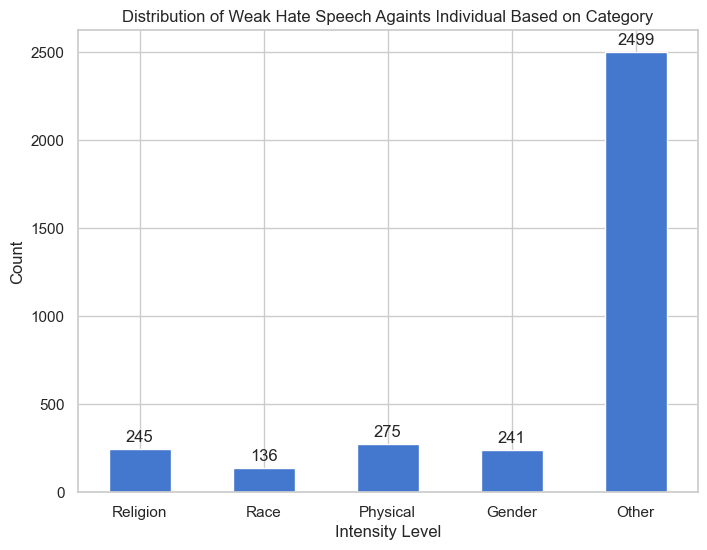

In [331]:
# Calculate individual and group sum value
df_subcategory_weak = df_weak[['HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']]
df_subcategory_weak.columns = ['Religion', 'Race', 'Physical', 'Gender', 'Other']
sums_subcategory_weak = df_subcategory_weak.iloc[:,].sum()

# Create bar plot
ax = sums_subcategory_weak.plot(kind='bar', color='#4477CE', figsize=(8,6))
ax.bar_label(ax.containers[0], padding=3, fmt='%.0f')

# Set plot labels and title
plt.xlabel('Intensity Level')
plt.ylabel('Count')
plt.title('Distribution of Weak Hate Speech Againts Individual Based on Category')

plt.xticks(rotation=360)

Text(0.5, 1.0, 'Moderate Hate Speech Distribution Based on Category')

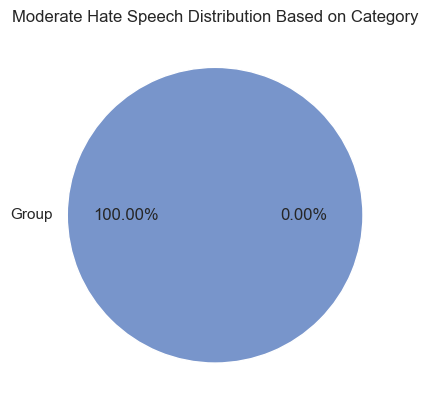

In [335]:
# Overall
df_category_moderate =  df_moderate[['HS_Individual', 'HS_Group']]
df_category_moderate.columns = ['Individual', 'Group']
sums_moderate_category = df_category_moderate.iloc[:,].sum()

# Plot Pie chart
colors = ['#4477CE','#7895CB']
sums_moderate_category.plot(kind='pie', autopct='%1.2f%%', colors=colors)
plt.title('Moderate Hate Speech Distribution Based on Category')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Religion'),
  Text(1, 0, 'Race'),
  Text(2, 0, 'Physical'),
  Text(3, 0, 'Gender'),
  Text(4, 0, 'Other')])

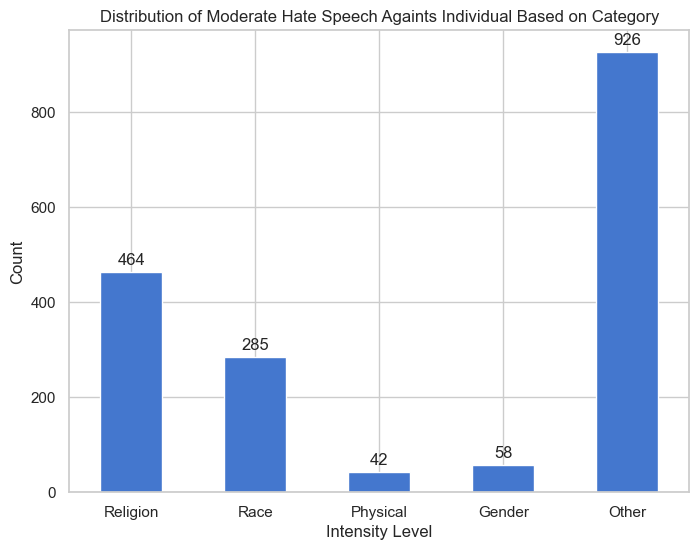

In [333]:
# Calculate individual and group sum value
df_subcategory_moderate = df_moderate[['HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']]
df_subcategory_moderate.columns = ['Religion', 'Race', 'Physical', 'Gender', 'Other']
sums_subcategory_moderate = df_subcategory_moderate.iloc[:,].sum()

# Create bar plot
ax = sums_subcategory_moderate.plot(kind='bar', color='#4477CE', figsize=(8,6))
ax.bar_label(ax.containers[0], padding=3, fmt='%.0f')

# Set plot labels and title
plt.xlabel('Intensity Level')
plt.ylabel('Count')
plt.title('Distribution of Moderate Hate Speech Againts Individual Based on Category')

plt.xticks(rotation=360)

Text(0.5, 1.0, 'Strong Hate Speech Distribution Based on Category')

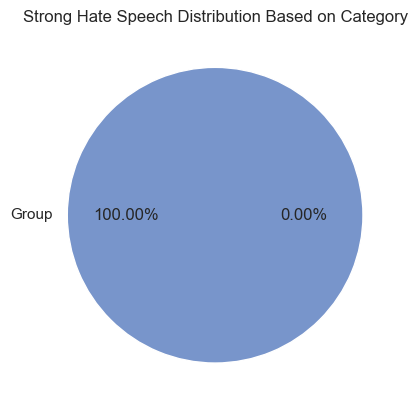

In [334]:
# Overall
df_category_strong =  df_strong[['HS_Individual', 'HS_Group']]
df_category_strong.columns = ['Individual', 'Group']
sums_strong_category = df_category_moderate.iloc[:,].sum()

# Plot Pie chart
colors = ['#4477CE','#7895CB']
sums_strong_category.plot(kind='pie', autopct='%1.2f%%', colors=colors)
plt.title('Strong Hate Speech Distribution Based on Category')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Religion'),
  Text(1, 0, 'Race'),
  Text(2, 0, 'Physical'),
  Text(3, 0, 'Gender'),
  Text(4, 0, 'Other')])

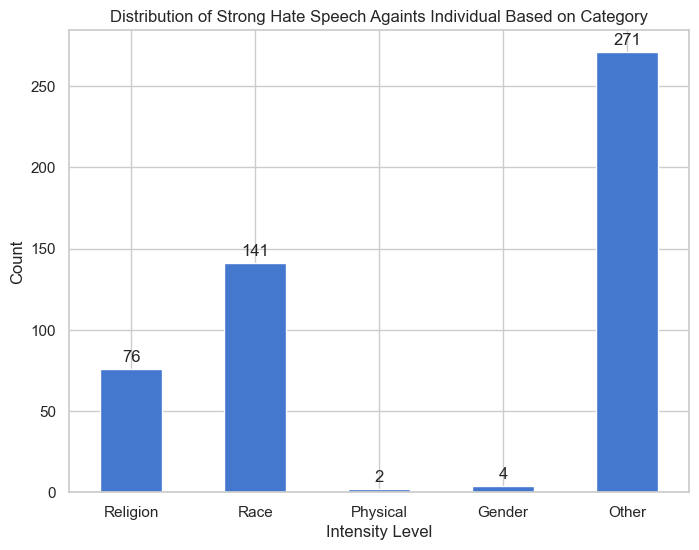

In [336]:
# Calculate individual and group sum value
df_subcategory_strong = df_strong[['HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other']]
df_subcategory_strong.columns = ['Religion', 'Race', 'Physical', 'Gender', 'Other']
sums_subcategory_strong = df_subcategory_strong.iloc[:,].sum()

# Create bar plot
ax = sums_subcategory_strong.plot(kind='bar', color='#4477CE', figsize=(8,6))
ax.bar_label(ax.containers[0], padding=3, fmt='%.0f')

# Set plot labels and title
plt.xlabel('Intensity Level')
plt.ylabel('Count')
plt.title('Distribution of S Hate Speech Againts Individual Based on Category')

plt.xticks(rotation=360)

## 7. Correlation between hate speech and abusive words usage

In [364]:
df_hs.loc[df_hs['Abusive'] == 1].shape[0]

3250

(array([0, 1]), [Text(0, 0, 'True'), Text(1, 0, 'False')])

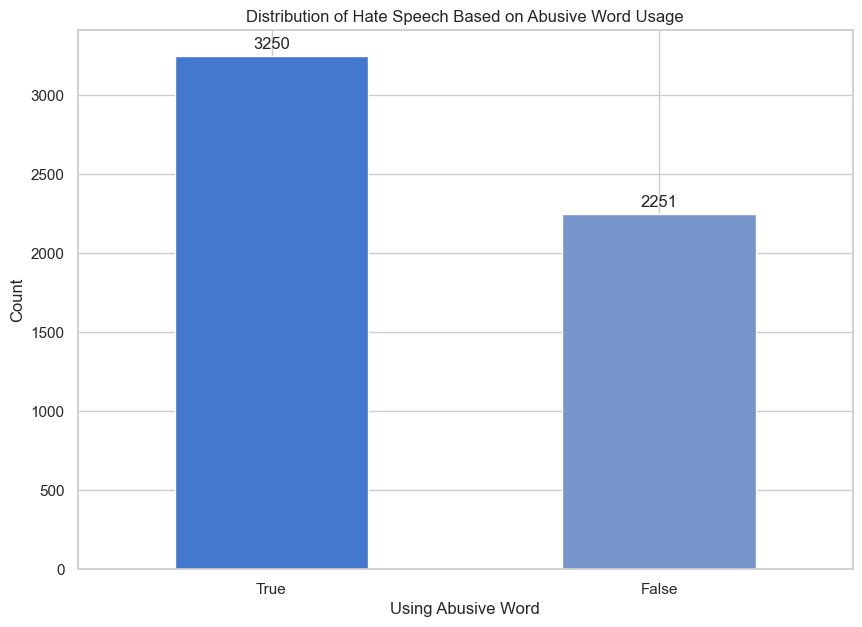

In [365]:
# Calculate each value
abusive_true = df_hs.loc[df_hs['Abusive'] == 1].shape[0]
abusive_false = df_hs.loc[df_hs['Abusive'] == 0].shape[0]

# creating the dataset
data = np.array([abusive_true, abusive_false])
ser = pd.Series(data, index=['True', 'False'])

# Create bar plot
colors = ['#4477CE','#7895CB','#91C8E4']
ax = ser.plot(kind='bar', color= colors, figsize=(10,7))
ax.bar_label(ax.containers[0], padding=3, fmt='%.0f')

# Set plot labels and title
plt.xlabel('Using Abusive Word')
plt.ylabel('Count')
plt.title('Distribution of Hate Speech Based on Abusive Word Usage')

plt.xticks(rotation=360)

Text(0.5, 1.0, 'Abusive Word Usage for Weak Hate Speech')

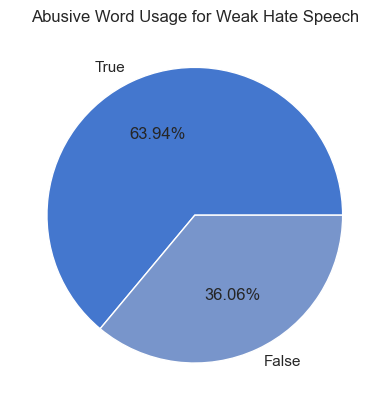

In [368]:
# Calculate each value
abusive_true_weak = df_weak.loc[df_weak['Abusive'] == 1].shape[0]
abusive_false_weak = df_weak.loc[df_weak['Abusive'] == 0].shape[0]

# creating the dataset
data_weak = np.array([abusive_true_weak, abusive_false_weak])
ser_weak = pd.Series(data_weak, index=['True', 'False'])

# Plot Pie chart
colors = ['#4477CE','#7895CB']
ser_weak.plot(kind='pie', autopct='%1.2f%%', colors=colors)
plt.title('Abusive Word Usage for Weak Hate Speech')

Text(0.5, 1.0, 'Abusive Word Usage for Moderate Hate Speech')

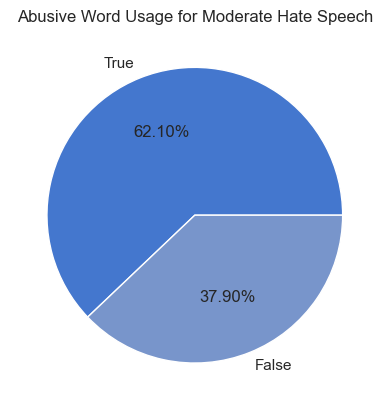

In [372]:
# Calculate each value
abusive_true_moderate = df_moderate.loc[df_moderate['Abusive'] == 1].shape[0]
abusive_false_moderate = df_moderate.loc[df_moderate['Abusive'] == 0].shape[0]

# creating the dataset
data_moderate = np.array([abusive_true_moderate, abusive_false_moderate])
ser_moderate = pd.Series(data_moderate, index=['True', 'False'])

# Plot Pie chart
colors = ['#4477CE','#7895CB']
ser_moderate.plot(kind='pie', autopct='%1.2f%%', colors=colors)
plt.title('Abusive Word Usage for Moderate Hate Speech')

Text(0.5, 1.0, 'Abusive Word Usage for Strong Hate Speech')

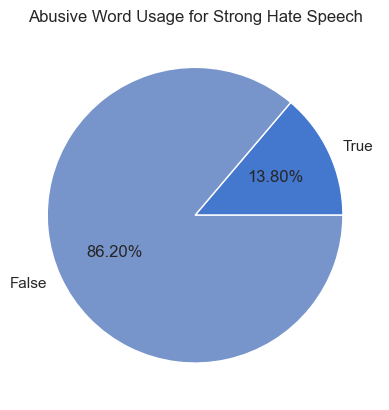

In [373]:
# Calculate each value
abusive_true_strong = df_strong.loc[df_strong['Abusive'] == 1].shape[0]
abusive_false_strong  = df_strong.loc[df_strong['Abusive'] == 0].shape[0]

# creating the dataset
data_strong = np.array([abusive_true_strong, abusive_false_strong])
ser_strong  = pd.Series(data_strong, index=['True', 'False'])

# Plot Pie chart
colors = ['#4477CE','#7895CB']
ser_strong.plot(kind='pie', autopct='%1.2f%%', colors=colors)
plt.title('Abusive Word Usage for Strong Hate Speech')

In [396]:
df_dummy_2 = df_dummy.copy()
df_dummy_2['abusive_count'] = df_dummy_2['abusive_word'].apply(len)

In [414]:
# function to change boolean value into categorical
def hs_level_rank(row):
   if row['HS_Weak'] == True:
      return '1'
   if row['HS_Moderate'] == True:
      return '2'
   if row['HS_Strong'] == True:
      return '3'

In [415]:
df_dummy_2['HS_Rank'] = df_dummy_2.apply(hs_level_rank, axis=1)

In [419]:
df_plot = df_dummy_2[['HS_Rank', 'abusive_count']]
df_plot = df_plot.replace(to_replace='None', value=np.nan).dropna()
df_plot

,HS_Rank,abusive_count
0,1,1
4,2,3
5,2,2
10,1,1
11,1,1
...,...,...
13157,1,0
13161,1,1
13162,2,2
13164,1,2


<Axes: xlabel='HS_Rank', ylabel='abusive_count'>

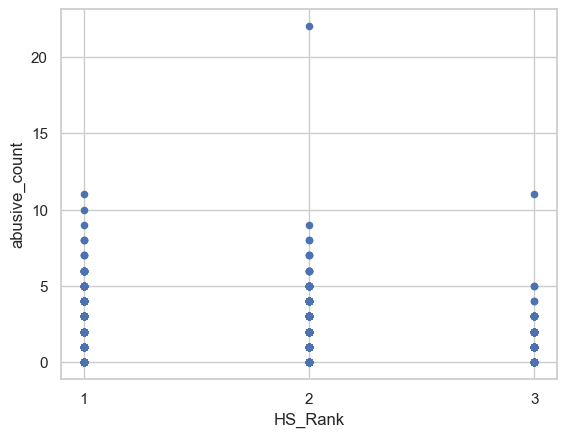

In [432]:
# plot the graph
df_plot.plot(x='HS_Rank', y='abusive_count', kind = 'scatter')